In [76]:
import pandas as pd 
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
from sklearn import preprocessing



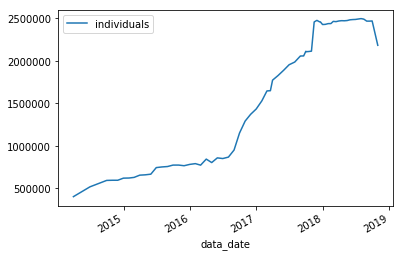

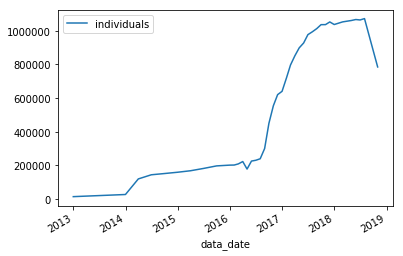

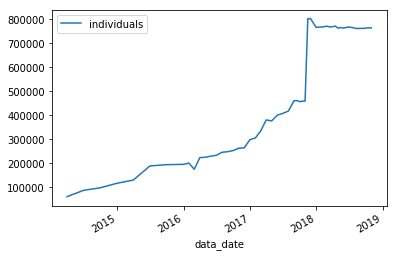

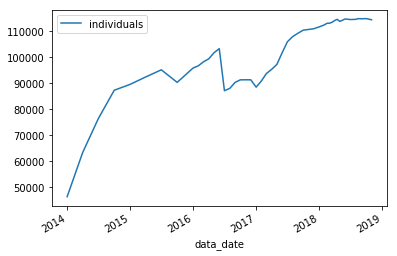

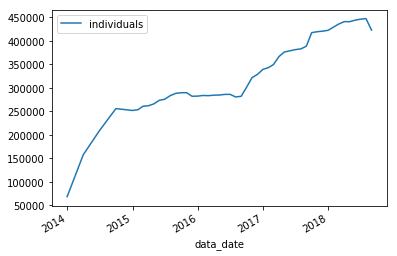

In [131]:
# Import refugee data 
# DRC
df = pd.read_json("data/refugees to DRC.json")
df_drc = json_normalize((df.loc['timeseries', 'data']))
df_drc['data_date'] = pd.to_datetime(df_drc['data_date'])

# Ethiopa
df = pd.read_json("data/refugees to Ethiopia.json")
df_ethiopia = json_normalize((df.loc['timeseries', 'data']))
df_ethiopia['data_date'] = pd.to_datetime(df_ethiopia['data_date'])

# Kenya
df = pd.read_json("data/refugees to Kenya.json")
df_kenya = json_normalize((df.loc['timeseries', 'data']))
df_kenya['data_date'] = pd.to_datetime(df_kenya['data_date'])

# Sudan
df = pd.read_json("data/refugees to Sudan.json")
df_sudan = json_normalize((df.loc['timeseries', 'data']))
df_sudan['data_date'] = pd.to_datetime(df_sudan['data_date'])

# Uganda,
df = pd.read_json("data/refugees to Uganda.json")
df_uganda = json_normalize((df.loc['timeseries', 'data']))
df_uganda['data_date'] = pd.to_datetime(df_uganda['data_date'])
#df_uganda['data_date'] = df_uganda['data_date'] + pd.offsets.MonthBegin(0)
#df_uganda['data_date'] = df_uganda['data_date'].dt.strftime('%Y-%m')

dates = pd.concat([df_drc[['data_date']],df_ethiopia[['data_date']],df_kenya[['data_date']],df_sudan[['data_date']], df_uganda[['data_date']] ])

# dates = dates['data_date'].drop_duplicates().sort_values()

#all
df = pd.read_json("data/refugees from south-sudan all.json")
df_all = json_normalize((df.loc['timeseries', 'data']))
df_all['data_date'] = pd.to_datetime(df_all['data_date'])

df_all.plot(x='data_date',y='individuals')

df_uganda.plot(x='data_date',y='individuals')

df_sudan.plot(x='data_date',y='individuals')

df_kenya.plot(x='data_date',y='individuals')

df_ethiopia.plot(x='data_date',y='individuals')






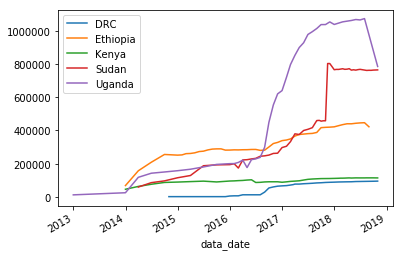

In [91]:
ax = df_drc.plot(x='data_date', y='individuals')

ax = df_ethiopia.plot(x='data_date', y='individuals', ax=ax)

ax = df_kenya.plot(x='data_date', y='individuals', ax=ax)

ax = df_sudan.plot(x='data_date', y='individuals', ax=ax)

ax = df_uganda.plot(x='data_date', y='individuals', ax=ax)

ax.legend(['DRC', 'Ethiopia', 'Kenya', 'Sudan', 'Uganda'])



In [79]:
df_incidents = pd.read_csv("data/incidents.csv", delimiter=';')
df_incidents['fatalities'] = df_incidents.fatalities.fillna(0)
df_incidents['event_date'] = pd.to_datetime(df_incidents['event_date'])

df_incidents.head()


,event_id_no_cnty,event_date,event_type,actor1,inter1,actor2,inter2,country,location,fatalities
0,5333.0,2018-09-11,Violence against civilians,Aluakluak Communal Militia (South Sudan),4.0,Civilians (South Sudan),7.0,South Sudan,Akot,2.0
1,5332.0,2018-06-11,Violence against civilians,Unidentified Armed Group (South Sudan),3.0,Civilians (South Sudan),7.0,South Sudan,Wau,1.0
2,5330.0,2018-02-11,Strategic development,SPLA/M-In Opposition: Sudanese Peoples Liberat...,2.0,Government of South Sudan (2011-),1.0,South Sudan,Juba,0.0
3,5331.0,2018-02-11,Violence against civilians,Unidentified Armed Group (South Sudan),3.0,Civilians (South Sudan),7.0,South Sudan,Tirangore,0.0
4,5328.0,2018-10-31,Violence against civilians,Murle Ethnic Militia (South Sudan),4.0,Civilians (South Sudan),7.0,South Sudan,Jalle,0.0


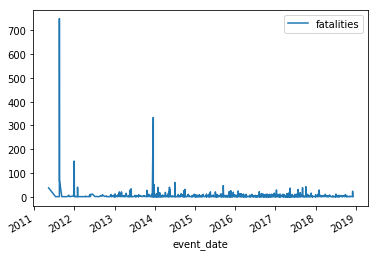

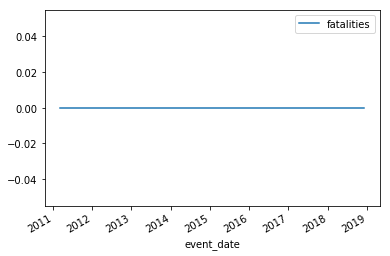

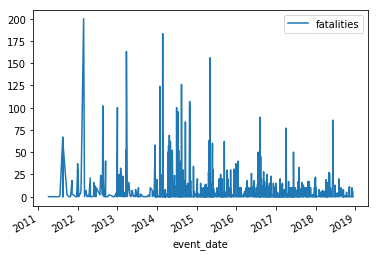

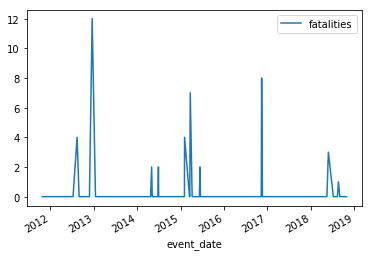

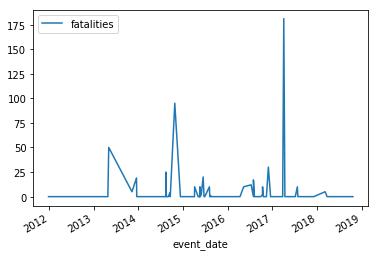

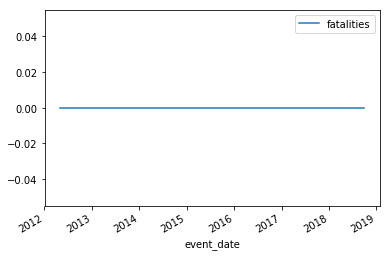

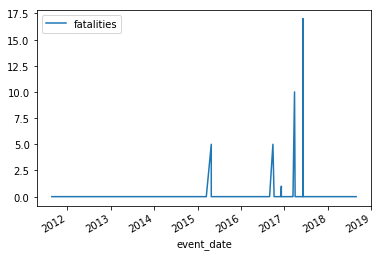

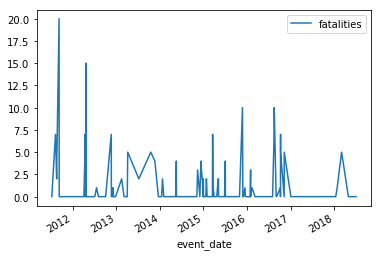

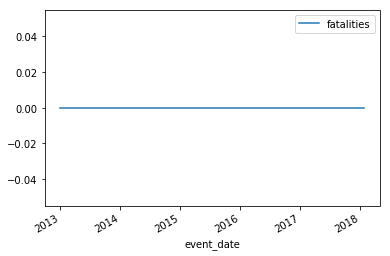

In [80]:
arr_event = []
for item in pd.unique(df_incidents['event_type']):
    df_tmp = df_incidents.loc[df_incidents['event_type'] == item]
    arr_event.append(df_tmp)
    
for item in arr_event:
    item.plot(x='event_date', y='fatalities')


In [103]:
df_incidents['event_date'] = pd.to_datetime(df_incidents['event_date'])
df_incidents['event_date'] = df_incidents['event_date'] + pd.offsets.MonthBegin(0)
df_incidents['event_date'] = df_incidents['event_date'].dt.strftime('%Y-%m')
df_incidents['event_date'] = pd.to_datetime(df_incidents['event_date'])

df_incidents.head()

,event_id_no_cnty,event_date,event_type,actor1,inter1,actor2,inter2,country,location,fatalities
0,5333.0,2018-10-01,Violence against civilians,Aluakluak Communal Militia (South Sudan),4.0,Civilians (South Sudan),7.0,South Sudan,Akot,2.0
1,5332.0,2018-07-01,Violence against civilians,Unidentified Armed Group (South Sudan),3.0,Civilians (South Sudan),7.0,South Sudan,Wau,1.0
2,5330.0,2018-03-01,Strategic development,SPLA/M-In Opposition: Sudanese Peoples Liberat...,2.0,Government of South Sudan (2011-),1.0,South Sudan,Juba,0.0
3,5331.0,2018-03-01,Violence against civilians,Unidentified Armed Group (South Sudan),3.0,Civilians (South Sudan),7.0,South Sudan,Tirangore,0.0
4,5328.0,2018-11-01,Violence against civilians,Murle Ethnic Militia (South Sudan),4.0,Civilians (South Sudan),7.0,South Sudan,Jalle,0.0


In [161]:
df_agg  = df_incidents[['event_date', 'fatalities']]

#df_agg3 = df_agg

#df_agg3['fatalities'] = pd.Series.cumsum(df_agg3['fatalities'])

#df_agg3.plot()


df_agg2 = df_agg.groupby('event_date').sum()


df_agg2['fatalities'] = pd.Series.cumsum(df_agg2['fatalities'])


df_agg2['fatalities'] = df_agg2['fatalities'] / df_agg2['fatalities'].max()

#df_agg2['event_date'] = pd.to_datetime(df_agg2['event_date'])

df_agg2.reset_index(inplace=True)
#df_agg2.plot(x='event_date', y='fatalities')
df_agg2


,event_date,fatalities
0,2011-04-01,0.000000
1,2011-05-01,0.000000
2,2011-06-01,0.002285
3,2011-08-01,0.002347
4,2011-09-01,0.088809
5,2011-10-01,0.090168
6,2011-11-01,0.090168
7,2011-12-01,0.091959
8,2012-01-01,0.103940
9,2012-02-01,0.110981


In [153]:
# Import food data
df_food = pd.read_csv("data/wfp_food_prices_south-sudan.csv")
df_food = df_food.drop(df_food.index[0])
df_food['date'] = pd.to_datetime(df_food['date'])
df_food['price'] = pd.to_numeric(df_food['price'])
#df_food['cmname'] = df_food['cmname'].astype('|S')

#df_food['date'] = df_food['date'] + pd.offsets.MonthBegin(0)
#df_food['date'] = df_food['date'].dt.strftime('%Y-%m')

df_food.head()

,date,cmname,unit,category,price,currency,country,admname,adm1id,mktname,mktid,cmid,ptid,umid,catid,sn,default
1,2012-01-15,Fuel (diesel) - Retail,L,non-food,7.9063,SSP,South Sudan,NaN,0,National Average,1199.0,284,15.0,15.0,8,1199_284_15_15,NaN
2,2012-02-15,Fuel (diesel) - Retail,L,non-food,7.2750,SSP,South Sudan,NaN,0,National Average,1199.0,284,15.0,15.0,8,1199_284_15_15,NaN
3,2012-03-15,Fuel (diesel) - Retail,L,non-food,7.4531,SSP,South Sudan,NaN,0,National Average,1199.0,284,15.0,15.0,8,1199_284_15_15,NaN
4,2012-04-15,Fuel (diesel) - Retail,L,non-food,8.1719,SSP,South Sudan,NaN,0,National Average,1199.0,284,15.0,15.0,8,1199_284_15_15,NaN
5,2012-05-15,Fuel (diesel) - Retail,L,non-food,11.9688,SSP,South Sudan,NaN,0,National Average,1199.0,284,15.0,15.0,8,1199_284_15_15,NaN


C:\Users\keije\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


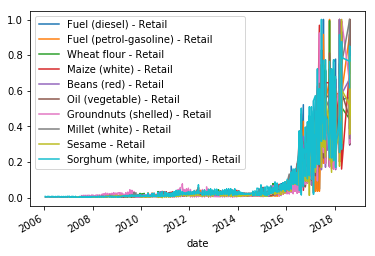

In [172]:
foodarray = []
foodnames = []
fig, ax = plt.subplots()

for item in pd.unique(df_food['cmname']):
    df_tmp = df_food.loc[df_food['cmname'] == item]
    if df_tmp.shape[0] > 150:
        df_tmp['price'] = df_tmp['price'] / df_tmp['price'].max()
        foodnames.append(item)
        foodarray.append(df_tmp)
    
    
for item in foodarray:
    #item.plot(x='date', y='price', legend='cname')
    ax = item.plot(x='date', y='price', ax=ax, legend=False)
    
ax.legend(foodnames)


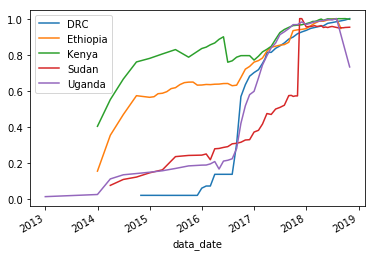

In [93]:
df_drc['individuals'] = df_drc['individuals'] / df_drc['individuals'].max()

ax = df_drc.plot(x='data_date', y='individuals')

df_ethiopia['individuals'] = df_ethiopia['individuals'] / df_ethiopia['individuals'].max()

ax = df_ethiopia.plot(x='data_date', y='individuals', ax=ax)

df_kenya['individuals'] = df_kenya['individuals'] / df_kenya['individuals'].max()

ax = df_kenya.plot(x='data_date', y='individuals', ax=ax)

df_sudan['individuals'] = df_sudan['individuals'] / df_sudan['individuals'].max()

ax = df_sudan.plot(x='data_date', y='individuals', ax=ax)

df_uganda['individuals'] = df_uganda['individuals'] / df_uganda['individuals'].max()

ax = df_uganda.plot(x='data_date', y='individuals', ax=ax)

ax.legend(['DRC', 'Ethiopia', 'Kenya', 'Sudan', 'Uganda'])

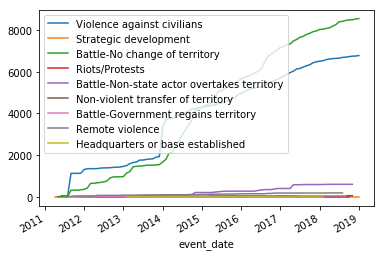

In [122]:
incidentarray = []
incidentnames = []
fig, ax = plt.subplots()

for item in pd.unique(df_incidents['event_type']):
    df_tmp = df_incidents.loc[df_incidents['event_type'] == item]
    if df_tmp.shape[0] > 0:
        df_agg  = df_tmp[['event_date', 'fatalities']]
        df_agg2 = df_agg.groupby('event_date').sum()
        df_agg2['fatalities'] = pd.Series.cumsum(df_agg2['fatalities'])
        #df_agg2['fatalities'] = df_agg2['fatalities'] / df_agg2['fatalities'].max()
        incidentnames.append(item)
        incidentarray.append(df_agg2)
    
    
for item in incidentarray:
    #item.plot(x='event_date', y='fatalities')
    ax = item.plot(ax=ax, legend=False)
    
ax.legend(incidentnames)

0.4628584006381535

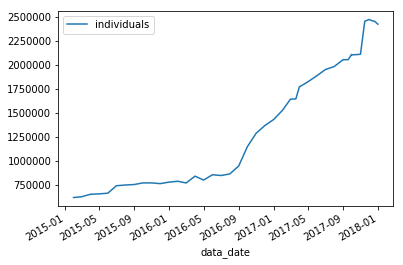

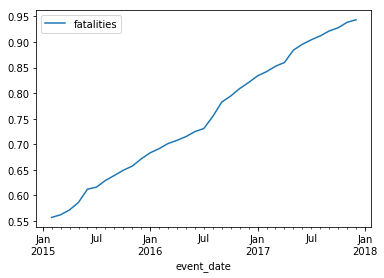

In [171]:
#correlation check

mask_all = (df_all['data_date'] > '2015-1-1') & (df_all['data_date'] < '2018-1-1')
df_all_mask =  df_all.loc[mask_all]
df_all_mask.plot(x='data_date',y='individuals')

mask_fat = (df_agg2['event_date'] > '2015-1-1') & (df_agg2['event_date'] < '2018-1-1')
df_fat_mask =  df_agg2.loc[mask_fat]
df_fat_mask.plot(x='event_date', y='fatalities')

df_all_mask['individuals'].corr(df_fat_mask['fatalities'])